In [1]:
# Install pandas_datareader using pip
!pip install pandas_datareader

In [2]:
# Install scikit-learn using pip
!pip install scikit-learn

In [3]:
# Install Keras using pip
!pip install keras

In [4]:
!pip install tensorflow

In [5]:
#Import Python Libraries

import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense,LSTM

In [6]:
#Steps for stock price prediction
#1. Get historical stock data of Ethereum and plot.
#2. Filter and convert the stock price data.
#3. Prepare Ethereum dataset for training the model.
#4. Scale the data between 0 and 1.
#5. Create the training sets (Training Features - X and Target variables - Y).
#6. Build the Long Short Term Memory (LSTM) 4 Layered Neural Network model.
#7. Compile and training the LSTM model.
#8. Create a test data set for testing the trained model.
#9. Check the testing data again what is trained.
#10. Plot the Cryptocurrency Price Predictions.
#11. Show Close Price and Prediction Price
#12. What is the Ethereum Cryptocurrency price for tomorrow 

In [7]:
#Get stock historical data of 2 years.

def get_historical_data(quote):
    end  = datetime.now()
    start = datetime(end.year-2,end.month,end.day)
    df = web.DataReader(quote, data_source='yahoo', start=start, end=end)
    return(df)

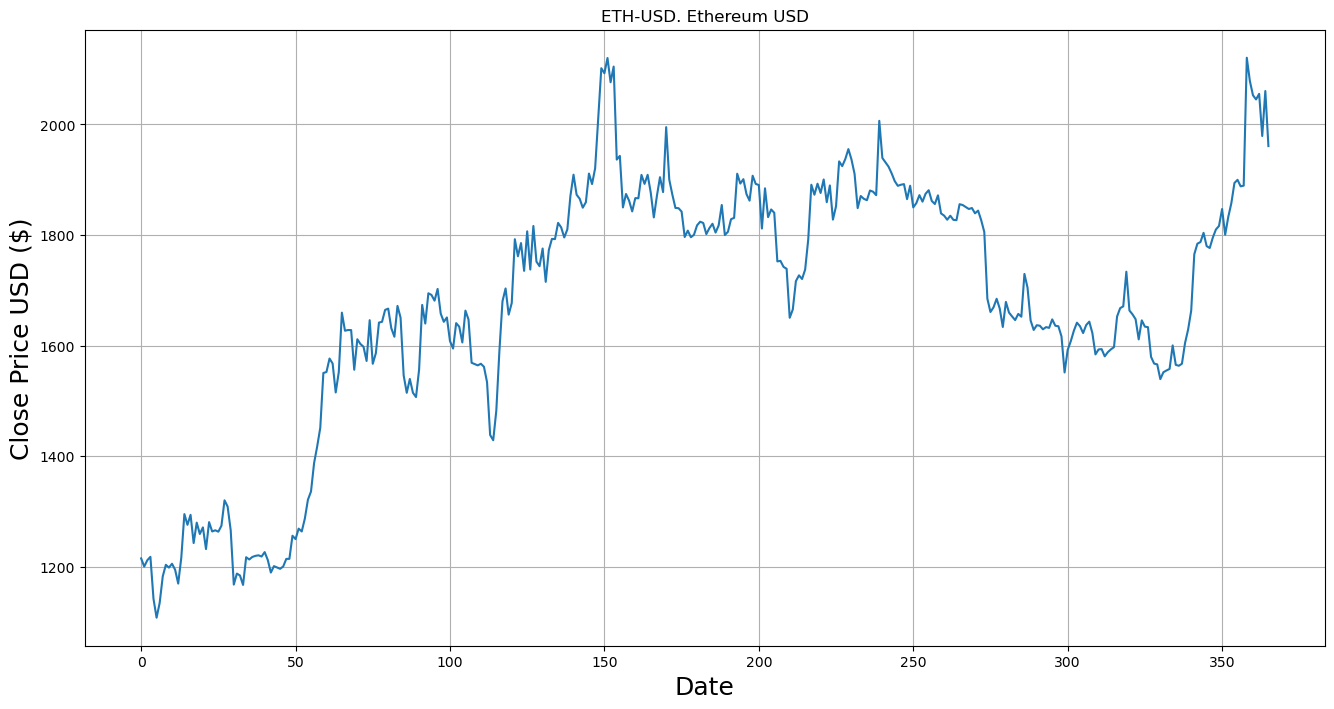

In [8]:
#1. Get historical stock data of Ethereum and plot.

#Eth = get_historical_data('ETH-USD')
Eth = pd.read_csv('ETH-USD.csv')
plt.figure(figsize=(16,8))
plt.title('ETH-USD. Ethereum USD')
plt.plot(Eth['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.grid()
plt.show()

In [9]:
#2. Filter and convert the stock price data.

Eth = Eth.filter(['Close']) #only interested in the closing Ethereum price
Eth_dataset = Eth.values

In [10]:
#3. Prepare Ethereum dataset for training the model.

training_data_length = math.ceil(len(Eth_dataset)*0.8)

In [11]:
#4. Scale the data between 0 and 1.

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Eth_dataset)

In [12]:
#5. Create the training sets (Training Features - X and Target variables - Y).

train_data = scaled_data[0:training_data_length, :]
x_training = []
y_training = []
for i in range(60, len(train_data)):
    x_training.append(train_data[i-60:i, 0])
    y_training.append(train_data[i, 0])
x_training, y_training = np.array(x_training), np.array(y_training)
x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))
x_training.shape

(233, 60, 1)

In [13]:
#6. Build the Long Short Term Memory (LSTM) 4 Layered Neural Network model.

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_training.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#7. Compile and training the LSTM model.

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_training, y_training, batch_size=1, epochs=7)


Epoch 1/7

233/233 [==============================] - 14s 37ms/step - loss: 0.0139
Epoch 2/7
233/233 [==============================] - 9s 38ms/step - loss: 0.0078
Epoch 3/7
233/233 [==============================] - 9s 39ms/step - loss: 0.0070
Epoch 4/7
233/233 [==============================] - 9s 40ms/step - loss: 0.0054
Epoch 5/7
233/233 [==============================] - 8s 32ms/step - loss: 0.0045
Epoch 6/7
233/233 [==============================] - 9s 40ms/step - loss: 0.0043
Epoch 7/7
233/233 [==============================] - 9s 40ms/step - loss: 0.0040


In [16]:
#8. Create a test data set for testing the trained model.

test_data = scaled_data[training_data_length - 60: ,:]
x_testing = []
y_testing = Eth_dataset[training_data_length: , :]
for i in range(60, len(test_data)):
    x_testing.append(test_data[i-60:i, 0])
x_testing = np.array(x_testing) #converting to a numpy array
#reshape array
x_testing = np.reshape(x_testing, (x_testing.shape[0], x_testing.shape[1], 1))


In [17]:
#9. Check the testing data again what is trained.

# A RMSE of zero is a perfect score
predictions = model.predict(x_testing)
predictions = scaler.inverse_transform(predictions)
rnse = np.sqrt(np.mean(predictions - y_testing) ** 2)
rnse

3/3 [==============================] - 1s 26ms/step


34.20813904644691

C:\Users\Nirav Shah\AppData\Local\Temp\ipykernel_27660\1604208932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


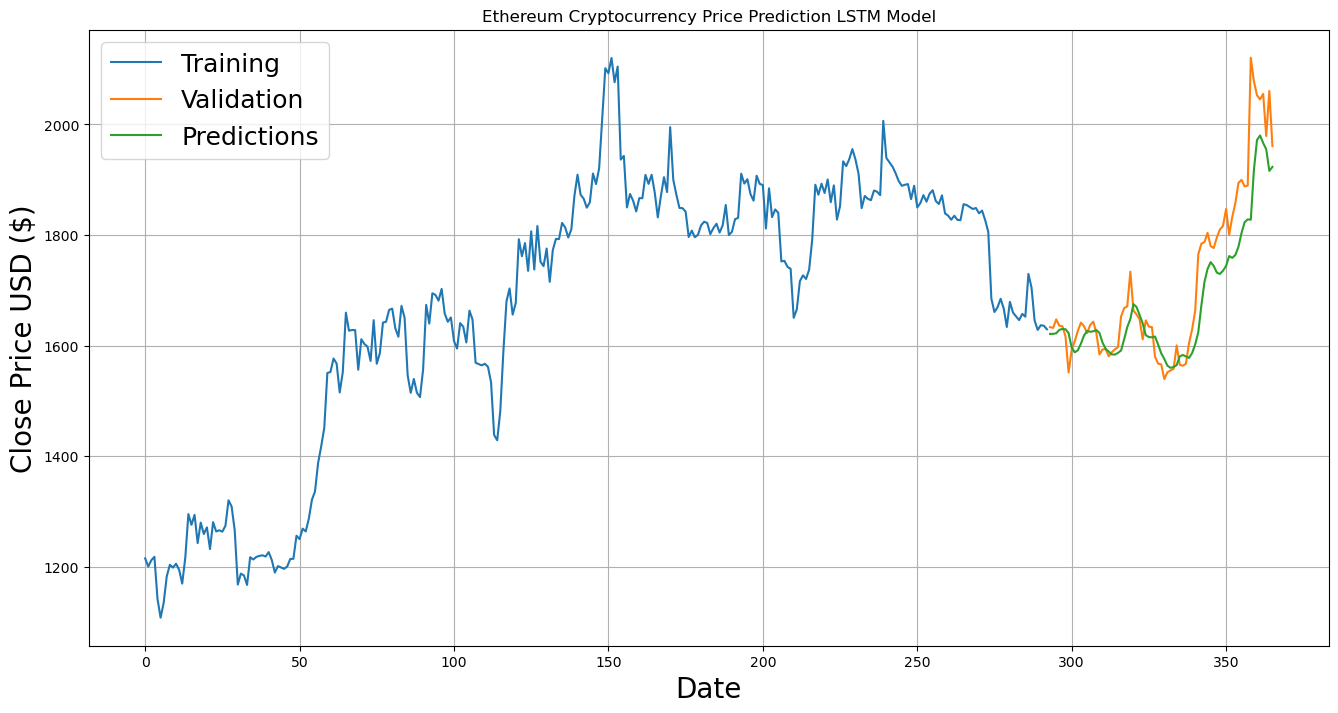

In [18]:
#10. Plot the Cryptocurrency Price Predictions.

train = Eth[:training_data_length]
valid = Eth[training_data_length:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Ethereum Cryptocurrency Price Prediction LSTM Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Predictions'], loc='upper left', fontsize=18)
plt.grid()
plt.show()

In [19]:
#11. Show Close Price and Prediction Price
valid

,Close,Predictions
293,1633.63,1621.316895
294,1632.25,1621.406738
295,1647.60,1622.546997
296,1636.14,1628.698730
297,1635.16,1630.283447
...,...,...
361,2045.19,1980.069580
362,2055.27,1966.479736
363,1979.05,1954.984009
364,2060.41,1916.020386


In [34]:
#12. What is the Ethereum Cryptocurrency price for tomorrow 

df = pd.read_csv('ETH-USD.csv')
#close_df = df[['Close']]
#df = get_historical_data('Eth')
df = df.filter(['Close'])

past_60_days = df[-60:].values
past_60_days_scaled = scaler.transform(past_60_days)
X_test = []
X_test.append(past_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction_price = model.predict(X_test)
prediction_price = scaler.inverse_transform(prediction_price)
print(prediction_price)

1/1 [==============================] - 0s 75ms/step
[[1898.2063]]
